In [39]:
 # Dependencies and Setup
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# File to Load (Remember to Change These)
school_data_to_load = "schools_complete.csv"
student_data_to_load = "students_complete.csv"

In [3]:
# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

In [4]:
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

In [5]:
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [6]:
# Calculate the total number of schools
schools_total = school_data_complete["school_name"].nunique()

In [7]:
# Calculate the total number of students
students_total = school_data_complete["Student ID"].nunique()

In [8]:
# Calculate the total budget
school_groups = school_data_complete.drop_duplicates("budget")
total_budget = school_groups["budget"].sum()

In [9]:
# Calculate the average math score
avg_math_score = school_data_complete["math_score"].mean()

In [10]:
# Calculate the average reading score
avg_reading_score = school_data_complete["reading_score"].mean()
overall_avg_score = (avg_math_score + avg_reading_score)/2

In [11]:
# Calculate the percentage of students with a passing math score (70 or greater)
math_pass_students = school_data_complete.loc[school_data_complete["math_score"] > 69]
math_pass_percentage = (math_pass_students["Student ID"].count()/students_total)*100

In [12]:
# Calculate the percentage of students with a passing reading score (70 or greater)
read_pass_students = school_data_complete.loc[school_data_complete["reading_score"]> 69]
read_pass_percentage = (read_pass_students["Student ID"].count()/students_total)*100

In [13]:
district_summary = pd.DataFrame(
                        {"Total Schools": [schools_total], 
                         "Total Students": [students_total], 
                         "Average Math Score": [avg_math_score],
                         "Average Reading Score": [avg_reading_score],
                         "% Passing Math": [math_pass_percentage],
                         "% Passing Reading": [read_pass_percentage],
                         "% Overall Passing Rate": [overall_avg_score]
                        }
)

In [14]:
district_summary

,Total Schools,Total Students,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
0,15,39170,78.985371,81.87784,74.980853,85.805463,80.431606


In [15]:
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


Create an overview table that summarizes key metrics about each school, including:
School Name
School Type
Total Students
Total School Budget
Per Student Budget
Average Math Score
Average Reading Score
% Passing Math
% Passing Reading
Overall Passing Rate (Average of the above two)

In [16]:
school_data_complete['pass_math'] = school_data_complete['math_score'] > 69

In [18]:
school_data_complete['pass_reading'] = school_data_complete['reading_score'] > 69

In [22]:
schools_grouped = school_data_complete.groupby('school_name').aggregate({'type':'first',
                                                       'Student ID': 'count',
                                                       'budget': 'first',
                                                       'math_score':'mean',
                                                        'reading_score': 'mean',
                                                        'pass_math': 'mean',
                                                        'pass_reading':'mean',
                                                        })

In [23]:
schools_grouped.head()

,type,Student ID,budget,math_score,reading_score,pass_math,pass_reading
school_name,,,,,,,
Bailey High School,District,4976,3124928,77.048432,81.033963,0.666801,0.819333
Cabrera High School,Charter,1858,1081356,83.061895,83.975780,0.941335,0.970398
Figueroa High School,District,2949,1884411,76.711767,81.158020,0.659885,0.807392
Ford High School,District,2739,1763916,77.102592,80.746258,0.683096,0.792990
Griffin High School,Charter,1468,917500,83.351499,83.816757,0.933924,0.971390


In [24]:
schools_grouped['Per Student Budget'] = schools_grouped['budget']/schools_grouped['Student ID']
schools_grouped['Overall Passing Rate'] = (schools_grouped['pass_math']+ schools_grouped['pass_reading'])/2

In [26]:
schools_grouped = schools_grouped.rename({'Student ID':'Total Students'}, axis=1)

In [28]:
schools_grouped.sort_values("Overall Passing Rate", ascending=False).head(5)

,type,Total Students,budget,math_score,reading_score,pass_math,pass_reading,Per Student Budget,Overall Passing Rate
school_name,,,,,,,,,
Cabrera High School,Charter,1858,1081356,83.061895,83.975780,0.941335,0.970398,582.0,0.955867
Thomas High School,Charter,1635,1043130,83.418349,83.848930,0.932722,0.973089,638.0,0.952905
Pena High School,Charter,962,585858,83.839917,84.044699,0.945946,0.959459,609.0,0.952703
Griffin High School,Charter,1468,917500,83.351499,83.816757,0.933924,0.971390,625.0,0.952657
Wilson High School,Charter,2283,1319574,83.274201,83.989488,0.938677,0.965396,578.0,0.952037


In [29]:
schools_grouped.sort_values("Overall Passing Rate", ascending=True).head(5)

,type,Total Students,budget,math_score,reading_score,pass_math,pass_reading,Per Student Budget,Overall Passing Rate
school_name,,,,,,,,,
Rodriguez High School,District,3999,2547363,76.842711,80.744686,0.663666,0.802201,637.0,0.732933
Figueroa High School,District,2949,1884411,76.711767,81.158020,0.659885,0.807392,639.0,0.733639
Huang High School,District,2917,1910635,76.629414,81.182722,0.656839,0.813164,655.0,0.735002
Johnson High School,District,4761,3094650,77.072464,80.966394,0.660576,0.812224,650.0,0.736400
Ford High School,District,2739,1763916,77.102592,80.746258,0.683096,0.792990,644.0,0.738043


In [30]:
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget,pass_math,pass_reading
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635,True,False
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635,False,True
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635,False,True
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635,False,False
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635,True,True


In [34]:
school_data_complete.groupby(['school_name','grade'])[['reading_score','math_score']].mean().unstack(level=1)

reading_score                                   \
grade                          10th       11th       12th        9th   
school_name                                                            
Bailey High School        80.907183  80.945643  80.912451  81.303155   
Cabrera High School       84.253219  83.788382  84.287958  83.676136   
Figueroa High School      81.408912  80.640339  81.384863  81.198598   
Ford High School          81.262712  80.403642  80.662338  80.632653   
Griffin High School       83.706897  84.288089  84.013699  83.369193   
Hernandez High School     80.660147  81.396140  80.857143  80.866860   
Holden High School        83.324561  83.815534  84.698795  83.677165   
Huang High School         81.512386  81.417476  80.305983  81.290284   
Johnson High School       80.773431  80.616027  81.227564  81.260714   
Pena High School          83.612000  84.335938  84.591160  83.807273   
Rodriguez High School     80.629808  80.864811  80.376426  80.993127   
Shelton High School       83.441964  84.373786  82.781671  84.122642   
Thomas High School        84.254157  83.585542  83.831361  83.728850   
Wilson High School        84.021452  83.764608  84.317673  83.939778   
Wright High School        83.812757  84.156322  84.073171  83.833333   

                      math_score                                   
grade                       10th       11th       12th        9th  
school_name                                                        
Bailey High School     76.996772  77.515588  76.492218  77.083676  
Cabrera High School    83.154506  82.765560  83.277487  83.094697  
Figueroa High School   76.539974  76.884344  77.151369  76.403037  
Ford High School       77.672316  76.918058  76.179963  77.361345  
Griffin High School    84.229064  83.842105  83.356164  82.044010  
Hernandez High School  77.337408  77.136029  77.186567  77.438495  
Holden High School     83.429825  85.000000  82.855422  83.787402  
Huang High School      75.908735  76.446602  77.225641  77.027251  
Johnson High School    76.691117  77.491653  76.863248  77.187857  
Pena High School       83.372000  84.328125  84.121547  83.625455  
Rodriguez High School  76.612500  76.395626  77.690748  76.859966  
Shelton High School    82.917411  83.383495  83.778976  83.420755  
Thomas High School     83.087886  83.498795  83.497041  83.590022  
Wilson High School     83.724422  83.195326  83.035794  83.085578  
Wright High School     84.010288  83.836782  83.644986  83.264706

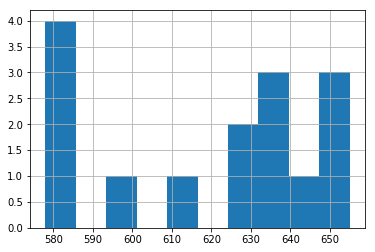

In [40]:
schools_grouped['Per Student Budget'].hist()

In [48]:
schools_grouped['PSB Bin'] = pd.cut(schools_grouped['Per Student Budget'],bins=[575,595,615,635,655])

In [50]:
schools_grouped.groupby(['PSB Bin'])[['math_score','reading_score','pass_reading','pass_math','Overall Passing Rate']].mean()

,math_score,reading_score,pass_reading,pass_math,Overall Passing Rate
PSB Bin,,,,,
"(575, 595]",83.455399,83.933814,0.966109,0.934601,0.950355
"(595, 615]",83.599686,83.885211,0.959003,0.942309,0.950656
"(615, 635]",80.199966,82.425360,0.895361,0.800362,0.847862
"(635, 655]",77.866721,81.368774,0.829956,0.703473,0.766714


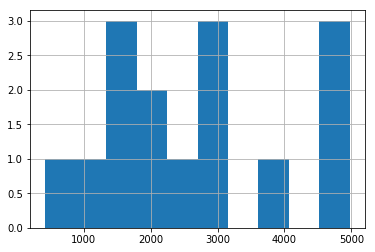

In [51]:
schools_grouped['Total Students'].hist()

In [52]:
schools_grouped['Pop Bin'] = pd.cut(schools_grouped['Total Students'],bins=[0,1500,3000,4500,6000])

In [53]:
schools_grouped.groupby(['Pop Bin'])[['math_score','reading_score','pass_reading','pass_math','Overall Passing Rate']].mean()

,math_score,reading_score,pass_reading,pass_math,Overall Passing Rate
Pop Bin,,,,,
"(0, 1500]",83.664898,83.892148,0.964459,0.934976,0.949718
"(1500, 3000]",80.904987,82.822740,0.905886,0.835570,0.870728
"(3000, 4500]",76.842711,80.744686,0.802201,0.663666,0.732933
"(4500, 6000]",77.136883,80.978256,0.813396,0.664969,0.739182


In [54]:

schools_grouped.groupby(['type'])[['math_score','reading_score','pass_reading','pass_math','Overall Passing Rate']].mean()

,math_score,reading_score,pass_reading,pass_math,Overall Passing Rate
type,,,,,
Charter,83.473852,83.896421,0.965865,0.936208,0.951037
District,76.956733,80.966636,0.807991,0.665485,0.736738
